<a href="https://colab.research.google.com/github/douglasmmachado/Battery_SoC/blob/main/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import nnfs

In [4]:
!pip install nnfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Modeling 1 neuron 3 inputs 3 weights 1 output
inputs = [1,2,3]
weights = [0.2,0.8,-0.5]
bias = 2

output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias)
print(output)

2.3

In [ ]:
#Modeling 1 neuron 4 inputs 4 weights 1 output
inputs = [1,2,3,2.5]
weights = [0.2,0.8,-0.5,1]
bias = 2

output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias)
print(output)

4.8


In [ ]:
#Modeling 3 neurons 4 inputs 4 weights 3 output
inputs = [1,2,3,2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [(inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1),
          (inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2),
          (inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3)]
print(output)

[4.8, 1.21, 2.385]


In [ ]:
#Object-oriented NN

inputs = [1,2,3,2.5]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2,3,0.5]

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
  
  neuron_output = 0

  for n_input, weight in zip(inputs, neuron_weights):
    neuron_output += n_input*weight

  neuron_output += neuron_bias
  layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]

In [ ]:
#Using numpy
import numpy as np

inputs = np.array([1,2,3,2.5])

print(f'Inputs shape: {inputs.shape}')

weights = np.array([[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

print(f'Weights shape: {weights.shape}')

biases = [2,3,0.5]


#To use dot here, we must consider the shape of inputs and weights, so weights.*inputs works but inputs.*weights don't
layer_outputs = np.dot(weights,inputs) + biases

print(layer_outputs)

Inputs shape: (4,)
Weights shape: (3, 4)
[4.8   1.21  2.385]


In [ ]:
# A Layer of Neurons & Batch of Data w/ NumPy

inputs = [[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]]

weights = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]
biases = [2.0,3.0,0.5]

outputs = np.dot(inputs, np.array(weights).T) + biases
print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [ ]:
# 2 Layers of Neurons & Batch of Data w/ NumPy


inputs = [[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]]

weights1 = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]

weights2 = [[0.1,-0.14,0.5],
            [-0.5,0.12,-0.33],
            [-0.44,0.73,-0.13]]

biases1 = [2.0,3.0,0.5]
biases2 = [-1,2,-0.5]

layer1_outputs = np.dot(inputs, np.array(weights1).T) + biases1
outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


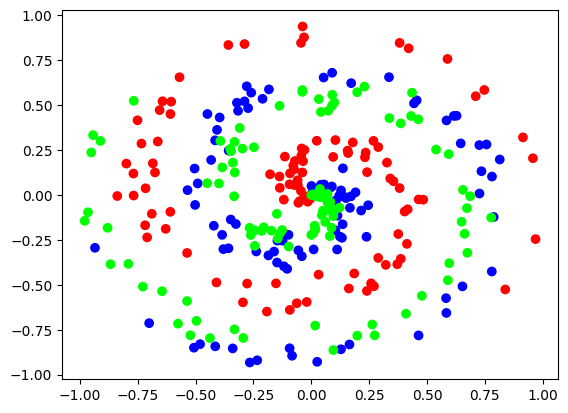

In [ ]:
#Training data
from nnfs.datasets import spiral_data
import nnfs
import matplotlib.pyplot as plt
nnfs.init()

'''
  The ​nnfs.init()​ does three things: it sets the random seed to 0 (by the default), creates a
  float32​ dtype default, and overrides the original dot product from NumPy. All of these are meant
  to ensure repeatable results for following along
'''

X, y = spiral_data(samples=100,classes = 3)
plt.scatter(X[:,0],X[:,1], c=y, cmap='brg')
plt.show()


In [3]:
class Layer_Dense:

  def __init__(self, n_inputs, n_neurons):

    self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

  def backward(self, dvalues):
    self.dweights = np.dot(self.inputs.T, dvalues)
    self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
    self.dinputs = np.dot(dvalues, self.weights.T)

In [6]:
class Activation_ReLU:

  def forward(self, inputs):
    self.inputs = inputs
    self.output = np.maximum(0,inputs)
  
  def backward(self, dvalues):
    self.dinputs = dvalues.copy()
    self.dinputs[self.inputs <= 0 ] = 0

In [11]:
class Activation_SoftMax:
  def forward(self, inputs):

    exp_values = np.exp(inputs - np.max(inputs,axis=1, keepdims=True))

    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    self.output = probabilities

  def backward(self, dvalues):
    self.dinputs = np.empty_like(dvalues)

    for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
      sigle_output = single_output.reshape(-1,1)
      jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
      self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


In [9]:
class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

In [10]:
class Loss_CategoricalCrossEntropy(Loss):

  def forward(self, y_pred, y_true):
    samples = len(y_pred)

    # Clip data to prevent division by 0
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

    # Probabilities for target values
    # Only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples),y_true]
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

    '''
      This class inherits the ​Loss​ class and performs all the error calculations that we derived
      throughout this chapter and can be used as an object. For example, using the manually-created
      output and targets:
    '''
  def backward(self, dvalues, y_true):
    samples = len(dvalues)
    labels = len(dvalues[0])
    if len(y_true.shape) == 1:
      y_true = np.eye(labels)[y_true]
    self.dinputs = -y_true / dvalues
    self.dinputs = self.dinputs / samples

In [ ]:
if __name__ == '__main__':
  X, y = spiral_data(samples=100,classes = 3)
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense1.forward(X)
  activation1.forward(dense1.output)
  
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  dense2.forward(activation1.output)

  activation2.forward(dense2.output)

  print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333308 0.33333343 0.33333346]
 [0.33333334 0.33333334 0.33333334]
 [0.33333212 0.33333403 0.3333339 ]
 [0.33333266 0.33333355 0.33333376]]


In [ ]:
# Loss calculation test

softmax_outputs = np.array([[0.7,0.1,0.2],
                            [0.1,0.5,0.4],
                            [0.02,0.9,0.08]])

class_targets = np.array([[1,0,0],
                          [0,1,0],
                          [0,1,0]])

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(softmax_outputs,class_targets)
print(loss)

0.38506088005216804


In [ ]:
# Calculating loss for the pratical example

if __name__ == '__main__':

  X, y = spiral_data(samples=100,classes = 3)
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense1.forward(X)
  activation1.forward(dense1.output)
  
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  dense2.forward(activation1.output)

  activation2.forward(dense2.output)
  print('softmax output:',activation2.output[:5])

  loss_function = Loss_CategoricalCrossEntropy()
  loss = loss_function.calculate(activation2.output, y)
  print('loss:', loss)

softmax output: [[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.3333333  0.33333334 0.33333334]
 [0.33333308 0.33333343 0.33333352]]
loss: 1.0986102


In [ ]:
# Accuracy calculation test

softmax_outputs = np.array([[0.7,0.1,0.2],
                            [0.1,0.5,0.4],
                            [0.02,0.9,0.08]])

class_targets = np.array([[0,1,1]])

predictions = np.argmax(softmax_outputs, axis=1)
print('predictions: ',predictions)

if len(class_targets.shape) == 2:
 class_targets = np.argmax(class_targets,axis=1)
print('y: ', class_targets)

accuracy = np.mean(predictions==class_targets)
print('acc: ',accuracy)

predictions:  [0 1 1]
y:  [1]
acc:  0.6666666666666666


In [ ]:
# Calculating loss for the pratical example + Accuracy

if __name__ == '__main__':

  X, y = spiral_data(samples=100,classes = 3)
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense1.forward(X)
  activation1.forward(dense1.output)
  
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  dense2.forward(activation1.output)

  activation2.forward(dense2.output)
  print('softmax output:',activation2.output[:5])

  loss_function = Loss_CategoricalCrossEntropy()
  loss = loss_function.calculate(activation2.output, y)

  predictions = np.argmax(activation2.output, axis=1)
  if len(y.shape) == 2:
    y = np.argmax(y,axis=1)
  accuracy = np.mean(predictions==y)
  print('acc: ', accuracy)
  print('loss: ', loss)

softmax output: [[0.33333334 0.33333334 0.33333334]
 [0.3333336  0.3333332  0.33333313]
 [0.33333394 0.3333331  0.33333296]
 [0.33333418 0.33333305 0.33333278]
 [0.3333345  0.3333329  0.33333257]]
acc:  0.31333333333333335
loss:  1.0986118


# Introducing optimization

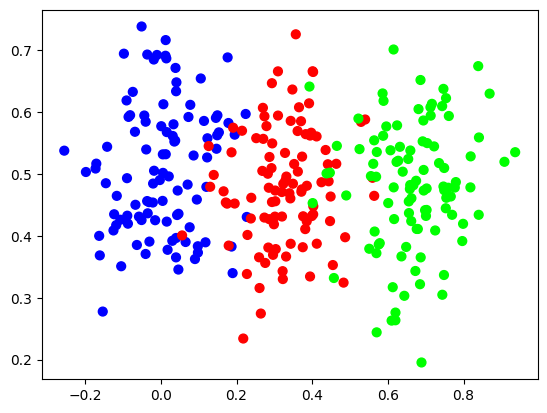

In [ ]:
from nnfs.datasets import vertical_data
nnfs.init()

X, y = vertical_data(samples=100,classes = 3)
plt.scatter(X[:,0], X[:,1],c=y, s = 40, cmap = 'brg')
plt.show()

In [ ]:
if __name__ == '__main__':
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  loss_function = Loss_CategoricalCrossEntropy()

  lowest_loss = 9999999
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()

  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  best_loss_list = []

  for iteration in range(10000):
    
    #update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases += 0.05 * np.random.randn(1,3)

    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases += 0.05 * np.random.randn(1,3)

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output,y)

    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
      print('New set of weights found, iteration', iteration,
            'loss: ', loss,
            'acc: ', accuracy)
      
      best_dense1_weights = dense1.weights.copy()
      best_dense1_biases = dense1.biases.copy()

      best_dense2_weights = dense2.weights.copy()
      best_dense2_biases = dense2.biases.copy()

      lowest_loss = loss
      best_loss_list.append(loss)

    else:
      dense1.weights = best_dense1_weights.copy()
      dense1.biases = best_dense1_biases.copy()

      dense2.weights = best_dense2_weights.copy()
      dense2.biases = best_dense2_biases.copy()
      best_loss_list.append(lowest_loss)


New set of weights found, iteration 0 loss:  1.099118 acc:  0.3333333333333333
New set of weights found, iteration 1 loss:  1.0989674 acc:  0.26666666666666666
New set of weights found, iteration 4 loss:  1.0986066 acc:  0.3333333333333333
New set of weights found, iteration 8 loss:  1.0982399 acc:  0.54
New set of weights found, iteration 10 loss:  1.0959697 acc:  0.3333333333333333
New set of weights found, iteration 11 loss:  1.0957791 acc:  0.3333333333333333
New set of weights found, iteration 12 loss:  1.0937208 acc:  0.3333333333333333
New set of weights found, iteration 13 loss:  1.0902215 acc:  0.3333333333333333
New set of weights found, iteration 15 loss:  1.0880699 acc:  0.33666666666666667
New set of weights found, iteration 21 loss:  1.0855219 acc:  0.3333333333333333
New set of weights found, iteration 22 loss:  1.0832243 acc:  0.3333333333333333
New set of weights found, iteration 23 loss:  1.0828549 acc:  0.3333333333333333
New set of weights found, iteration 24 loss: 

Text(0.5, 1.0, 'Loss over iterations')

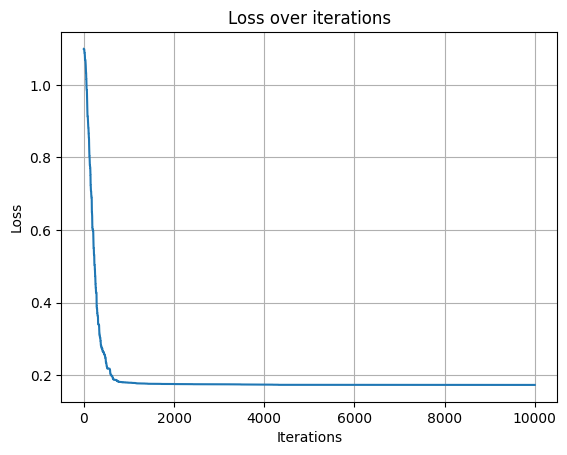

In [ ]:
plt.plot(best_loss_list)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations')

In [ ]:
#Trying with spiral dataset


if __name__ == '__main__':
  X, y = spiral_data(samples=100,classes = 3)
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  loss_function = Loss_CategoricalCrossEntropy()

  lowest_loss = 9999999
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()

  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  best_loss_list = []

  for iteration in range(10000):
    
    #update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases += 0.05 * np.random.randn(1,3)

    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases += 0.05 * np.random.randn(1,3)

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output,y)

    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
      print('New set of weights found, iteration', iteration,
            'loss: ', loss,
            'acc: ', accuracy)
      
      best_dense1_weights = dense1.weights.copy()
      best_dense1_biases = dense1.biases.copy()

      best_dense2_weights = dense2.weights.copy()
      best_dense2_biases = dense2.biases.copy()

      lowest_loss = loss
      best_loss_list.append(loss)

    else:
      dense1.weights = best_dense1_weights.copy()
      dense1.biases = best_dense1_biases.copy()

      dense2.weights = best_dense2_weights.copy()
      dense2.biases = best_dense2_biases.copy()
      best_loss_list.append(lowest_loss)


New set of weights found, iteration 0 loss:  1.0990813 acc:  0.35
New set of weights found, iteration 5 loss:  1.0982906 acc:  0.3333333333333333
New set of weights found, iteration 8 loss:  1.098179 acc:  0.36
New set of weights found, iteration 19 loss:  1.0978074 acc:  0.3333333333333333
New set of weights found, iteration 20 loss:  1.096773 acc:  0.3933333333333333
New set of weights found, iteration 22 loss:  1.0960612 acc:  0.35
New set of weights found, iteration 27 loss:  1.0946094 acc:  0.36333333333333334
New set of weights found, iteration 40 loss:  1.0937933 acc:  0.3433333333333333
New set of weights found, iteration 42 loss:  1.0917206 acc:  0.33666666666666667
New set of weights found, iteration 43 loss:  1.0908574 acc:  0.36666666666666664
New set of weights found, iteration 44 loss:  1.0906197 acc:  0.38333333333333336
New set of weights found, iteration 47 loss:  1.0881917 acc:  0.38666666666666666
New set of weights found, iteration 49 loss:  1.0874748 acc:  0.38
New

Text(0.5, 1.0, 'Loss over iterations')

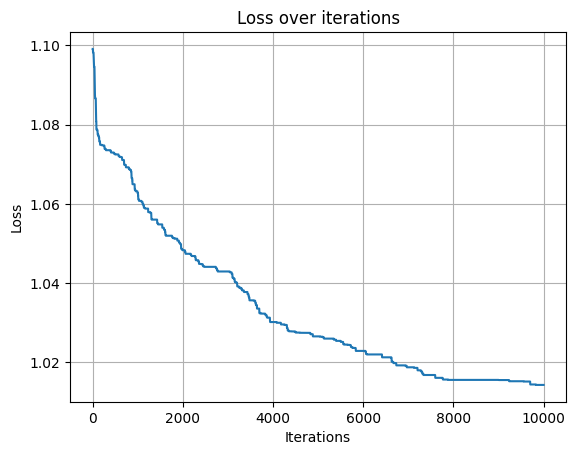

In [ ]:
plt.plot(best_loss_list)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations')